# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from pprint import pprint

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



625

['thunder bay', 'thunder bay']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
# set up lists to hold reponse info
citi=[]
lat = []
longi=[]
clouds=[]
temp = []
humidity=[]
pressure=[]
wind=[]
dat=[]
country=[]
unit="metric"
base_url = "http://api.openweathermap.org/data/2.5/weather?"
#city='delhi'
citiid=1
f= open("weatherlog.txt","w+")

for i in range(len(cities)):
    try:
        query_url = f"{base_url}q={cities[i]}&appid={api_key}&units={unit}"
        print(f'Processing Record {i} | {cities[i]}')
        f.write(f'Processing Record {i} | {cities[i]}/n')
        #print(f"Processing Record {citiid} {city} of {len(cities)}")
        #f.write("Processing Record " + str (citiid) + " of " + str(len(cities)) + " City Name - " + city +"\n")
        #citiid=citiid+1
        response = requests.get(query_url).json()
        f.write(str(response) + "\n")
        pprint (response)
        lat.append(response['coord']['lat'])
        longi.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        clouds.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        pressure.append(response['main']['pressure'])
        wind.append(response['wind']['speed'])
        dat.append(response['dt'])
        country.append(response['sys']['country'])       
        citi.append(cities[i]) 
       
    except:
        #print("City not found... skipping.")
        print("City\033[1m not\033[0;0m found. Skipping...")
        f.write(f'Processing Record {i} | {cities[i]}')
    pass

#Indicate that Data Loading is complete
print("----------------------------")
print("Data Load Complete     ")


Processing Record 0 | thunder bay
{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 48.41, 'lon': -89.26},
 'dt': 1547924400,
 'id': 6166142,
 'main': {'humidity': 48,
          'pressure': 1028,
          'temp': -21,
          'temp_max': -21,
          'temp_min': -21},
 'name': 'Thunder Bay',
 'sys': {'country': 'CA',
         'id': 906,
         'message': 0.0035,
         'sunrise': 1547905185,
         'sunset': 1547937401,
         'type': 1},
 'visibility': 32186,
 'weather': [{'description': 'clear sky',
              'icon': '02d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 290, 'speed': 4.6}}
Processing Record 1 | punta arenas
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -53.16, 'lon': -70.91},
 'dt': 1547924400,
 'id': 3874787,
 'main': {'humidity': 42,
          'pressure': 995,
          'temp': 17,
          'temp_max': 17,
          'temp_min': 17},
 'name': 'Punta Arenas',
 'sys': {

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -54.81, 'lon': -68.31},
 'dt': 1547924400,
 'id': 3833367,
 'main': {'humidity': 58,
          'pressure': 990,
          'temp': 14,
          'temp_max': 14,
          'temp_min': 14},
 'name': 'Ushuaia',
 'sys': {'country': 'AR',
         'id': 8303,
         'message': 0.0033,
         'sunrise': 1547886664,
         'sunset': 1547945769,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 230, 'gust': 21.1, 'speed': 15.9}}
Processing Record 16 | itarema
{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': -2.92, 'lon': -39.92},
 'dt': 1547927255,
 'id': 3393692,
 'main': {'grnd_level': 1020.43,
          'humidity': 87,
          'pressure': 1020.43,
          'sea_level': 1026.2,
          'temp': 26.61,
          'temp_max': 26.61,
       

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': -46.19, 'lon': 168.86},
 'dt': 1547927257,
 'id': 6201424,
 'main': {'grnd_level': 999.36,
          'humidity': 77,
          'pressure': 999.36,
          'sea_level': 1014.12,
          'temp': 12.26,
          'temp_max': 12.26,
          'temp_min': 12.26},
 'name': 'Mataura',
 'rain': {'3h': 0.2},
 'sys': {'country': 'NZ',
         'message': 0.0028,
         'sunrise': 1547831926,
         'sunset': 1547886668},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 278.503, 'speed': 10.48}}
Processing Record 32 | ulaanbaatar
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 47.92, 'lon': 106.92},
 'dt': 1547924400,
 'id': 2028462,
 'main': {'humidity': 75,
          'pressure': 1029,
          'temp': -27,
          'temp_max': -27,
          'temp_min': -27},
 'name': 'Ulaanbaatar',
 'sys

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 77.48, 'lon': -69.36},
 'dt': 1547927260,
 'id': 3831208,
 'main': {'grnd_level': 976.42,
          'humidity': 100,
          'pressure': 976.42,
          'sea_level': 1011.73,
          'temp': -31.87,
          'temp_max': -31.87,
          'temp_min': -31.87},
 'name': 'Qaanaaq',
 'sys': {'country': 'GL', 'message': 0.0048, 'sunrise': 0, 'sunset': 0},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 76.0032, 'speed': 4.68}}
Processing Record 46 | lasa
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 34.92, 'lon': 32.53},
 'dt': 1547924400,
 'id': 146639,
 'main': {'humidity': 81,
          'pressure': 1023,
          'temp': 12,
          'temp_max': 12,
          'temp_min': 12},
 'name': 'Lasa',
 'sys': {'country': 'CY',
         'id': 6374,
         'message': 0.0044,
         'sunr

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 43.44, 'lon': -3.46},
 'dt': 1547924400,
 'id': 3109527,
 'main': {'humidity': 71,
          'pressure': 1006,
          'temp': 9.47,
          'temp_max': 10,
          'temp_min': 9},
 'name': 'Santona',
 'sys': {'country': 'ES',
         'id': 6441,
         'message': 0.0029,
         'sunrise': 1547883661,
         'sunset': 1547917729,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 210, 'speed': 3.1}}
Processing Record 60 | dingle
{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 11, 'lon': 122.67},
 'dt': 1547927263,
 'id': 1714733,
 'main': {'grnd_level': 1002.52,
          'humidity': 97,
          'pressure': 1002.52,
          'sea_level': 1023.12,
          'temp': 22.51,
          'temp_max': 22.51,
          'temp_min': 22.51}

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': -26.98, 'lon': -56.83},
 'dt': 1547927265,
 'id': 3437029,
 'main': {'grnd_level': 1017.11,
          'humidity': 73,
          'pressure': 1017.11,
          'sea_level': 1027.01,
          'temp': 24.29,
          'temp_max': 24.29,
          'temp_min': 24.29},
 'name': 'San Patricio',
 'sys': {'country': 'PY',
         'message': 0.0035,
         'sunrise': 1547889058,
         'sunset': 1547937915},
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 166.503, 'speed': 3.13}}
Processing Record 74 | amderma
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 75 | partyzany
{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 45.14, 'lon': 35.15},
 'dt': 1547927265,
 'id': 692714,
 'main': {'grnd_level': 1030,
          'humidity': 100,
          'pr

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -23.58, 'lon': 149.07},
 'dt': 1547927268,
 'id': 2175403,
 'main': {'grnd_level': 1006.08,
          'humidity': 88,
          'pressure': 1006.08,
          'sea_level': 1028.91,
          'temp': 20.91,
          'temp_max': 20.91,
          'temp_min': 20.91},
 'name': 'Bluff',
 'sys': {'country': 'AU',
         'message': 0.0034,
         'sunrise': 1547839997,
         'sunset': 1547888126},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 103.503, 'speed': 3.23}}
Processing Record 91 | nizhniy tsasuchey
{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': 50.52, 'lon': 115.13},
 'dt': 1547927268,
 'id': 2019118,
 'main': {'grnd_level': 951.37,
          'humidity': 61,
          'pressure': 951.37,
          'sea_level': 1040.67,
          'temp': -17.89,
          'temp_max': -17.89,
  

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 46.17, 'lon': 12.71},
 'dt': 1547924100,
 'id': 3174084,
 'main': {'humidity': 74,
          'pressure': 1016,
          'temp': 2,
          'temp_max': 2,
          'temp_min': 2},
 'name': 'Maniago',
 'sys': {'country': 'IT',
         'id': 6753,
         'message': 0.0031,
         'sunrise': 1547880278,
         'sunset': 1547913351,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 100, 'speed': 1}}
Processing Record 105 | bafoussam
{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 5.48, 'lon': 10.42},
 'dt': 1547927271,
 'id': 2235189,
 'main': {'grnd_level': 875.98,
          'humidity': 69,
          'pressure': 875.98,
          'sea_level': 1025.23,
          'temp': 19.39,
          'temp_max': 19.39,
          'temp_min': 19.39}

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': 64.42, 'lon': -173.23},
 'dt': 1547927273,
 'id': 4031574,
 'main': {'grnd_level': 1025.38,
          'humidity': 100,
          'pressure': 1025.38,
          'sea_level': 1032,
          'temp': -9.32,
          'temp_max': -9.32,
          'temp_min': -9.32},
 'name': 'Provideniya',
 'sys': {'country': 'RU',
         'message': 0.0052,
         'sunrise': 1547931042,
         'sunset': 1547951875},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 342.003, 'speed': 1.98}}
Processing Record 118 | pacific grove
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 36.62, 'lon': -121.92},
 'dt': 1547925300,
 'id': 5380437,
 'main': {'humidity': 57,
          'pressure': 1028,
          'temp': 16.3,
          'temp_max': 17.8,
          'temp_min': 15},
 'name': 'Pacific Grove',
 'sys': {'co

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 15.86, 'lon': -97.07},
 'dt': 1547923260,
 'id': 3520994,
 'main': {'humidity': 66,
          'pressure': 1016,
          'temp': 29,
          'temp_max': 29,
          'temp_min': 29},
 'name': 'Puerto Escondido',
 'sys': {'country': 'MX',
         'id': 7157,
         'message': 0.0035,
         'sunrise': 1547902764,
         'sunset': 1547943553,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 260, 'speed': 5.1}}
Processing Record 131 | cockburn town
{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': 21.46, 'lon': -71.14},
 'dt': 1547927276,
 'id': 3576994,
 'main': {'grnd_level': 1029.76,
          'humidity': 100,
          'pressure': 1029.76,
          'sea_level': 1029.85,
          'temp': 25.79,
          'temp_max': 25.79,
       

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 46.86, 'lon': -68.01},
 'dt': 1547924160,
 'id': 4960140,
 'main': {'humidity': 46,
          'pressure': 1027,
          'temp': -21.14,
          'temp_max': -20,
          'temp_min': -22.2},
 'name': 'Caribou',
 'sys': {'country': 'US',
         'id': 3570,
         'message': 0.0067,
         'sunrise': 1547899773,
         'sunset': 1547932610,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 330, 'speed': 3.1}}
Processing Record 144 | riyadh
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 24.63, 'lon': 46.72},
 'dt': 1547924400,
 'id': 108410,
 'main': {'humidity': 39,
          'pressure': 1024,
          'temp': 10,
          'temp_max': 10,
          'temp_min': 10},
 'name': 'Riyadh',
 'sys': {'country': 'SA',
         'id': 7424,
      

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 159 | nishihara
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 35.74, 'lon': 139.53},
 'dt': 1547926200,
 'id': 1850144,
 'main': {'humidity': 55,
          'pressure': 1014,
          'temp': 2.08,
          'temp_max': 4,
          'temp_min': 0.5},
 'name': 'Nishihara',
 'sys': {'country': 'JP',
         'id': 8074,
         'message': 0.006,
         'sunrise': 1547848185,
         'sunset': 1547884550,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 280, 'speed': 2.1}}
Processing Record 160 | miandrivazo
{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': -19.53, 'lon': 45.46},
 'dt': 1547927281,
 'id': 1059051,
 'main': {'grnd_level': 983.14,
          'humidity': 96,
          'pressure': 983.14,
    

 'cod': 200,
 'coord': {'lat': 33.08, 'lon': -16.33},
 'dt': 1547924400,
 'id': 2270385,
 'main': {'humidity': 72,
          'pressure': 1027,
          'temp': 16,
          'temp_max': 16,
          'temp_min': 16},
 'name': 'Camacha',
 'sys': {'country': 'PT',
         'id': 6902,
         'message': 0.0101,
         'sunrise': 1547885235,
         'sunset': 1547922328,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 310, 'speed': 7.2}}
Processing Record 174 | penzance
{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': 50.12, 'lon': -5.53},
 'dt': 1547923800,
 'id': 2640377,
 'main': {'humidity': 93,
          'pressure': 1007,
          'temp': 6,
          'temp_max': 6,
          'temp_min': 6},
 'name': 'Penzance',
 'sys': {'country': 'GB',
         'id': 1393,
         'message': 0.0039,
         'sunrise': 15

{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': -3.31, 'lon': 129},
 'dt': 1547927290,
 'id': 1651591,
 'main': {'grnd_level': 1019.87,
          'humidity': 100,
          'pressure': 1019.87,
          'sea_level': 1020.53,
          'temp': 28.69,
          'temp_max': 28.69,
          'temp_min': 28.69},
 'name': 'Amahai',
 'sys': {'country': 'ID',
         'message': 0.0042,
         'sunrise': 1547846774,
         'sunset': 1547890997},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 285.503, 'speed': 4.78}}
Processing Record 189 | linqiong
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 30.42, 'lon': 103.46},
 'dt': 1547924400,
 'id': 1803365,
 'main': {'humidity': 75,
          'pressure': 1026,
          'temp': 8,
          'temp_max': 8,
          'temp_min': 8},
 'name': 'Linqiong',
 'sys': {'country': 'CN',
       

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -9.65, 'lon': 120.26},
 'dt': 1547927293,
 'id': 1622318,
 'main': {'grnd_level': 986.31,
          'humidity': 100,
          'pressure': 986.31,
          'sea_level': 1021.82,
          'temp': 21.26,
          'temp_max': 21.26,
          'temp_min': 21.26},
 'name': 'Waingapu',
 'sys': {'country': 'ID',
         'message': 0.0034,
         'sunrise': 1547848298,
         'sunset': 1547893666},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 249.503, 'speed': 1.33}}
Processing Record 204 | gujan-mestras
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 44.63, 'lon': -1.08},
 'dt': 1547924400,
 'id': 3014175,
 'main': {'humidity': 87,
          'pressure': 1008,
          'temp': 7.53,
          'temp_max': 8,
          'temp_min': 7},
 'name': 'Gujan-Mestras',
 'sys': {'country': 'FR

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 34.64, 'lon': -120.46},
 'dt': 1547925300,
 'id': 5367788,
 'main': {'humidity': 62,
          'pressure': 1026,
          'temp': 18.64,
          'temp_max': 20.3,
          'temp_min': 15},
 'name': 'Lompoc',
 'sys': {'country': 'US',
         'id': 4558,
         'message': 0.0082,
         'sunrise': 1547910419,
         'sunset': 1547947137,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 50.0032, 'speed': 0.53}}
Processing Record 217 | karakendzha
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 218 | leshukonskoye
{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': 64.9, 'lon': 45.76},
 'dt': 1547927296,
 'id': 535839,
 'main': {'grnd_level': 1004.95,
          'humidity': 85,
          'pressure': 100

         'message': 0.0053,
         'sunrise': 1547856509,
         'sunset': 1547882610},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 147.503, 'speed': 1.43}}
Processing Record 232 | najran
{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 17.54, 'lon': 44.22},
 'dt': 1547924400,
 'id': 103630,
 'main': {'humidity': 36,
          'pressure': 1023,
          'temp': 16,
          'temp_max': 16,
          'temp_min': 16},
 'name': 'Najran',
 'sys': {'country': 'SA',
         'id': 7421,
         'message': 0.0271,
         'sunrise': 1547869015,
         'sunset': 1547909470,
         'type': 1},
 'visibility': 1800,
 'weather': [{'description': 'dust', 'icon': '50n', 'id': 761, 'main': 'Dust'}],
 'wind': {'deg': 100, 'speed': 2.1}}
Processing Record 233 | monterey
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 36.6, 'lon': -121.89}

{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': -16.48, 'lon': -151.75},
 'dt': 1547927301,
 'id': 4034551,
 'main': {'grnd_level': 1025.95,
          'humidity': 100,
          'pressure': 1025.95,
          'sea_level': 1026.12,
          'temp': 28.06,
          'temp_max': 28.06,
          'temp_min': 28.06},
 'name': 'Faanui',
 'sys': {'country': 'PF',
         'message': 0.0028,
         'sunrise': 1547912959,
         'sunset': 1547959593},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 80.0032, 'speed': 6.08}}
Processing Record 248 | phan rang
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 249 | marolambo
{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': -20.05, 'lon': 48.13},
 'dt': 1547927302,
 'id': 1060007,
 'main': {'grnd_level': 918.7,
          'humidity': 99,
          

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 62.42, 'lon': 25.95},
 'dt': 1547925600,
 'id': 648739,
 'main': {'humidity': 85,
          'pressure': 998,
          'temp': -9,
          'temp_max': -9,
          'temp_min': -9},
 'name': 'Laukaa',
 'sys': {'country': 'FI',
         'id': 1337,
         'message': 0.0034,
         'sunrise': 1547882135,
         'sunset': 1547905152,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'speed': 1}}
Processing Record 261 | livramento
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -3.03, 'lon': -60.18},
 'dt': 1547926380,
 'id': 3663517,
 'main': {'humidity': 94,
          'pressure': 1011,
          'temp': 24.52,
          'temp_max': 26,
          'temp_min': 23},
 'name': 'Livramento',
 'sys': {'country': 'BR',
         'id': 8356,
         '

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 39.98, 'lon': -75.82},
 'dt': 1547926500,
 'id': 4557247,
 'main': {'humidity': 59,
          'pressure': 1020,
          'temp': 1.63,
          'temp_max': 3.3,
          'temp_min': 0},
 'name': 'Coatesville',
 'sys': {'country': 'US',
         'id': 5209,
         'message': 0.004,
         'sunrise': 1547900461,
         'sunset': 1547935667,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 100, 'speed': 3.1}}
Processing Record 273 | taihe
{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 26.8, 'lon': 114.92},
 'dt': 1547927306,
 'id': 1924023,
 'main': {'grnd_level': 1021.65,
          'humidity': 100,
          'pressure': 1021.65,
          'sea_level': 1038.48,
          'temp': 8.01,
          'temp_max': 8.01,
          'temp_min'

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 29.03, 'lon': 21.55},
 'dt': 1547927308,
 'id': 86049,
 'main': {'grnd_level': 1024.49,
          'humidity': 33,
          'pressure': 1024.49,
          'sea_level': 1032,
          'temp': 12.26,
          'temp_max': 12.26,
          'temp_min': 12.26},
 'name': 'Jalu',
 'sys': {'country': 'LY',
         'message': 0.0032,
         'sunrise': 1547875658,
         'sunset': 1547913716},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 149.503, 'speed': 1.68}}
Processing Record 287 | phan thiet
{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': 10.93, 'lon': 108.1},
 'dt': 1547927309,
 'id': 1571058,
 'main': {'grnd_level': 1018.65,
          'humidity': 94,
          'pressure': 1018.65,
          'sea_level': 1024.62,
          'temp': 24.61,
          'temp_max': 24.61,
         

         'message': 0.0047,
         'sunrise': 1547911198,
         'sunset': 1547943424,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 180, 'speed': 4.1}}
Processing Record 301 | east angus
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 45.48, 'lon': -71.66},
 'dt': 1547924400,
 'id': 5945016,
 'main': {'humidity': 63,
          'pressure': 1026,
          'temp': -21,
          'temp_max': -21,
          'temp_min': -21},
 'name': 'East Angus',
 'sys': {'country': 'CA',
         'id': 924,
         'message': 0.0044,
         'sunrise': 1547900386,
         'sunset': 1547933749,
         'type': 1},
 'visibility': 14484,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'speed': 1}}
Processing Record 302 | hasaki
{'base'

{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': -0.92, 'lon': 100.36},
 'dt': 1547927313,
 'id': 1633419,
 'main': {'grnd_level': 1016.87,
          'humidity': 100,
          'pressure': 1016.87,
          'sea_level': 1022.31,
          'temp': 26.71,
          'temp_max': 26.71,
          'temp_min': 26.71},
 'name': 'Padang',
 'rain': {'3h': 5.255},
 'sys': {'country': 'ID',
         'message': 0.0032,
         'sunrise': 1547853862,
         'sunset': 1547897660},
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 334.003, 'speed': 1.33}}
Processing Record 314 | niquelandia
{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': -14.47, 'lon': -48.46},
 'dt': 1547927314,
 'id': 3456285,
 'main': {'grnd_level': 955.83,
          'humidity': 74,
          'pressure': 955.83,
          'sea_level': 1022.39,
          'temp': 29.11,
        

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 29.14, 'lon': 21.3},
 'dt': 1547927316,
 'id': 88533,
 'main': {'grnd_level': 1028.62,
          'humidity': 30,
          'pressure': 1028.62,
          'sea_level': 1032.08,
          'temp': 13.91,
          'temp_max': 13.91,
          'temp_min': 13.91},
 'name': 'Awjilah',
 'sys': {'country': 'LY',
         'message': 0.003,
         'sunrise': 1547875731,
         'sunset': 1547913764},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 197.003, 'speed': 2.58}}
Processing Record 327 | axim
{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 4.87, 'lon': -2.24},
 'dt': 1547927316,
 'id': 2303611,
 'main': {'grnd_level': 1024.57,
          'humidity': 100,
          'pressure': 1024.57,
          'sea_level': 1026.97,
          'temp': 28.19,
          'temp_max': 28.19,
          't

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 52.47, 'lon': 1.45},
 'dt': 1547925600,
 'id': 2656067,
 'main': {'humidity': 92,
          'pressure': 1011,
          'temp': 1.57,
          'temp_max': 3,
          'temp_min': -1},
 'name': 'Broome',
 'sys': {'country': 'GB',
         'id': 1467,
         'message': 0.0035,
         'sunrise': 1547884373,
         'sunset': 1547914667,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 110, 'speed': 2.1}}
Processing Record 341 | vila franca do campo
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 37.72, 'lon': -25.43},
 'dt': 1547924400,
 'id': 3372472,
 'main': {'humidity': 77,
          'pressure': 1030,
          'temp': 15,
          'temp_max': 15,
          'temp_min': 15},
 'name': 'Vila Franca do Campo',
 'sys': {'country': 'PT',
      

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 61.99, 'lon': 5.14},
 'dt': 1547925600,
 'id': 3146487,
 'main': {'humidity': 86,
          'pressure': 1014,
          'temp': 1,
          'temp_max': 1,
          'temp_min': 1},
 'name': 'Raudeberg',
 'sys': {'country': 'NO',
         'id': 1616,
         'message': 0.0049,
         'sunrise': 1547886897,
         'sunset': 1547910380,
         'type': 1},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 90, 'speed': 3.6}}
Processing Record 354 | zamosc
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 50.72, 'lon': 23.25},
 'dt': 1547926200,
 'id': 753866,
 'main': {'humidity': 86,
          'pressure': 1021,
          'temp': -2,
          'temp_max': -2,
          'temp_min': -2},
 'name': 'Zamosc',
 'sys': {'country': 'PL',
         'id': 1702,
         'message': 0.0033,
         's

{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': 28.42, 'lon': 30.79},
 'dt': 1547927325,
 'id': 352628,
 'main': {'grnd_level': 1022.22,
          'humidity': 84,
          'pressure': 1022.22,
          'sea_level': 1034.26,
          'temp': 7.36,
          'temp_max': 7.36,
          'temp_min': 7.36},
 'name': 'Matay',
 'sys': {'country': 'EG',
         'message': 0.0031,
         'sunrise': 1547873371,
         'sunset': 1547911567},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 335.503, 'speed': 2.28}}
Processing Record 368 | bara
{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 10.41, 'lon': 10.6},
 'dt': 1547927325,
 'id': 2347758,
 'main': {'grnd_level': 978.36,
          'humidity': 45,
          'pressure': 978.36,
          'sea_level': 1025.67,
          'temp': 19.54,
          'temp_max': 19.54,
          'temp_

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 43.41, 'lon': -124.22},
 'dt': 1547924880,
 'id': 5742974,
 'main': {'humidity': 100,
          'pressure': 1024,
          'temp': 11,
          'temp_max': 11,
          'temp_min': 11},
 'name': 'North Bend',
 'sys': {'country': 'US',
         'id': 5239,
         'message': 0.0037,
         'sunrise': 1547912625,
         'sunset': 1547946742,
         'type': 1},
 'visibility': 12874,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 140, 'speed': 1.5}}
Processing Record 383 | haines junction
{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': 60.75, 'lon': -137.51},
 'dt': 1547927328,
 'id': 5969025,
 'main': {'grnd_level': 888.3,
          'humidity': 84,
          'pressure': 888.3,
          'sea_level': 1023.73,
          'temp': -22.34,
          'temp_max': -22.34,
         

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 35.04, 'lon': 32.42},
 'dt': 1547924400,
 'id': 146137,
 'main': {'humidity': 81,
          'pressure': 1023,
          'temp': 12,
          'temp_max': 12,
          'temp_min': 12},
 'name': 'Polis',
 'sys': {'country': 'CY',
         'id': 6374,
         'message': 0.0034,
         'sunrise': 1547873791,
         'sunset': 1547910368,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 20, 'speed': 3.1}}
Processing Record 397 | mikhaylovka
{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': 52.96, 'lon': 103.29},
 'dt': 1547927331,
 'id': 2015842,
 'main': {'grnd_level': 974.8,
          'humidity': 57,
          'pressure': 974.8,
          'sea_level': 1041.8,
          'temp': -21.49,
          'temp_max': -21.49,
          'temp_min': -21.4

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 411 | khanino
{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': 55.23, 'lon': 40.07},
 'dt': 1547927334,
 'id': 489862,
 'main': {'grnd_level': 1010.87,
          'humidity': 86,
          'pressure': 1010.87,
          'sea_level': 1027.01,
          'temp': -8.62,
          'temp_max': -8.62,
          'temp_min': -8.62},
 'name': 'Khanino',
 'sys': {'country': 'RU',
         'message': 0.0028,
         'sunrise': 1547875883,
         'sunset': 1547904617},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 280.503, 'speed': 5.03}}
Processing Record 412 | kinango
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -4.13, 'lon': 39.32},
 'dt': 1547927334,
 'id': 191833,
 'main': {'grnd_level': 1017.76,
          'humidity': 95,
          'pressure

{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': 69.7, 'lon': 170.27},
 'dt': 1547927336,
 'id': 2122090,
 'main': {'grnd_level': 1029.92,
          'humidity': 100,
          'pressure': 1029.92,
          'sea_level': 1037.95,
          'temp': -28.49,
          'temp_max': -28.49,
          'temp_min': -28.49},
 'name': 'Pevek',
 'sys': {'country': 'RU',
         'message': 0.0043,
         'sunrise': 1547854775,
         'sunset': 1547863235},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 203.003, 'speed': 3.43}}
Processing Record 425 | teya
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 21.05, 'lon': -89.07},
 'dt': 1547923560,
 'id': 3526662,
 'main': {'humidity': 41,
          'pressure': 1012,
          'temp': 33,
          'temp_max': 33,
          'temp_min': 33},
 'name': 'Teya',
 'sys': {'country': 'MX',
       

 'wind': {'deg': 356.503, 'speed': 0.43}}
Processing Record 438 | samusu
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 439 | arco
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 45.92, 'lon': 10.89},
 'dt': 1547925600,
 'id': 3182910,
 'main': {'humidity': 80,
          'pressure': 1015,
          'temp': 1.65,
          'temp_max': 4,
          'temp_min': -1},
 'name': 'Arco',
 'sys': {'country': 'IT',
         'id': 6776,
         'message': 0.0036,
         'sunrise': 1547880667,
         'sunset': 1547913836,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 280, 'speed': 0.5}}
Processing Record 440 | badou
{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': 7.58, 'lon': 0.61},
 'dt': 1547927339,
 'id': 2367660,
 'main': {'grnd_level': 981.52

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -41.87, 'lon': -73.83},
 'dt': 1547924400,
 'id': 3899695,
 'main': {'humidity': 60,
          'pressure': 1014,
          'temp': 23,
          'temp_max': 23,
          'temp_min': 23},
 'name': 'Ancud',
 'sys': {'country': 'CL',
         'id': 8512,
         'message': 0.0551,
         'sunrise': 1547891051,
         'sunset': 1547944066,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 110, 'speed': 3.6}}
Processing Record 454 | matveyevka
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 45.75, 'lon': 33.81},
 'dt': 1547927341,
 'id': 697568,
 'main': {'grnd_level': 1032.03,
          'humidity': 90,
          'pressure': 1032.03,
          'sea_level': 1038.44,
          'temp': -1.94,
          'temp_max': -1.94,
          'temp_min': -1.94},

 'cod': 200,
 'coord': {'lat': -32.7, 'lon': -57.63},
 'dt': 1547927345,
 'id': 3439525,
 'main': {'grnd_level': 1026.59,
          'humidity': 55,
          'pressure': 1026.59,
          'sea_level': 1032.56,
          'temp': 25.76,
          'temp_max': 25.76,
          'temp_min': 25.76},
 'name': 'Young',
 'sys': {'country': 'UY',
         'message': 0.0046,
         'sunrise': 1547888545,
         'sunset': 1547938807},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 107.003, 'speed': 5.13}}
Processing Record 466 | kidal
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 18.44, 'lon': 1.41},
 'dt': 1547927345,
 'id': 2455290,
 'main': {'grnd_level': 975.69,
          'humidity': 21,
          'pressure': 975.69,
          'sea_level': 1030.5,
          'temp': 15.56,
          'temp_max': 15.56,
          'temp_min': 15.56},
 'name': 'Kidal',
 'sys': {'countr

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 7.62, 'lon': -11.83},
 'dt': 1547927347,
 'id': 2409215,
 'main': {'grnd_level': 1019.14,
          'humidity': 74,
          'pressure': 1019.14,
          'sea_level': 1026.28,
          'temp': 27.56,
          'temp_max': 27.56,
          'temp_min': 27.56},
 'name': 'Mattru',
 'sys': {'country': 'SL',
         'message': 0.0029,
         'sunrise': 1547881551,
         'sunset': 1547923839},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 219.003, 'speed': 3.78}}
Processing Record 480 | santa maria
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -29.69, 'lon': -53.81},
 'dt': 1547924400,
 'id': 3450083,
 'main': {'humidity': 73,
          'pressure': 1016,
          'temp': 24,
          'temp_max': 24,
          'temp_min': 24},
 'name': 'Santa Maria',
 'sys': {'country': 'BR',
    

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 65.28, 'lon': -126.83},
 'dt': 1547924400,
 'id': 6089245,
 'main': {'humidity': 64,
          'pressure': 1013,
          'temp': -17,
          'temp_max': -17,
          'temp_min': -17},
 'name': 'Norman Wells',
 'sys': {'country': 'CA',
         'id': 951,
         'message': 0.0036,
         'sunrise': 1547920528,
         'sunset': 1547940114,
         'type': 1},
 'visibility': 48279,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 120, 'gust': 10.8, 'speed': 7.2}}
Processing Record 495 | kununurra
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -15.77, 'lon': 128.74},
 'dt': 1547925300,
 'id': 2068110,
 'main': {'humidity': 88,
          'pressure': 1006,
          'temp': 27,
          'temp_max': 27,
          'temp_min': 27},
 'name': 'Kununurra',
 'sys': {'country': 'AU'

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 59.06, 'lon': 80.87},
 'dt': 1547927355,
 'id': 1504382,
 'main': {'grnd_level': 1019.79,
          'humidity': 88,
          'pressure': 1019.79,
          'sea_level': 1028.19,
          'temp': -6.69,
          'temp_max': -6.69,
          'temp_min': -6.69},
 'name': 'Kargasok',
 'sys': {'country': 'RU',
         'message': 0.0041,
         'sunrise': 1547867428,
         'sunset': 1547893488},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 202.003, 'speed': 2.23}}
Processing Record 508 | marienburg
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 52.12, 'lon': 9.98},
 'dt': 1547925600,
 'id': 2803461,
 'main': {'humidity': 92,
          'pressure': 1017,
          'temp': -2,
          'temp_max': -1,
          'temp_min': -3},
 'name': 'Marienburg',
 'sys': {'country': 'DE',
  

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 38.73, 'lon': -27.07},
 'dt': 1547924400,
 'id': 3372760,
 'main': {'humidity': 77,
          'pressure': 1030,
          'temp': 15,
          'temp_max': 15,
          'temp_min': 15},
 'name': 'Praia da Vitoria',
 'sys': {'country': 'PT',
         'id': 6895,
         'message': 0.0041,
         'sunrise': 1547888578,
         'sunset': 1547924144,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 41.5032, 'speed': 3.53}}
Processing Record 522 | cap-aux-meules
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 47.38, 'lon': -61.86},
 'dt': 1547924400,
 'id': 5915327,
 'main': {'humidity': 66,
          'pressure': 1023,
          'temp': -12,
          'temp_max': -12,
          'temp_min': -12},
 'name': 'Cap-aux-Meules',
 'sys': {'country':

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 53.8, 'lon': -9.52},
 'dt': 1547924400,
 'id': 2960970,
 'main': {'humidity': 100,
          'pressure': 1008,
          'temp': 5,
          'temp_max': 5,
          'temp_min': 5},
 'name': 'Westport',
 'sys': {'country': 'IE',
         'id': 1566,
         'message': 0.0033,
         'sunrise': 1547887360,
         'sunset': 1547916948,
         'type': 1},
 'visibility': 400,
 'weather': [{'description': 'fog', 'icon': '50n', 'id': 741, 'main': 'Fog'}],
 'wind': {'deg': 150, 'speed': 1.5}}
Processing Record 534 | carauari
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -4.88, 'lon': -66.9},
 'dt': 1547927360,
 'id': 3664659,
 'main': {'grnd_level': 1012.57,
          'humidity': 68,
          'pressure': 1012.57,
          'sea_level': 1020.69,
          'temp': 30.61,
          'temp_max': 30.61,
          'temp_min': 30.61},
 'name': 'Carauari',
 'rain': {'3h': 0.61},
 'sys': {

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -21.64, 'lon': -41.05},
 'dt': 1547924400,
 'id': 3448903,
 'main': {'humidity': 55,
          'pressure': 1010,
          'temp': 31,
          'temp_max': 31,
          'temp_min': 31},
 'name': 'Sao Joao da Barra',
 'sys': {'country': 'BR',
         'id': 8337,
         'message': 0.0036,
         'sunrise': 1547885857,
         'sunset': 1547933544,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 90, 'speed': 9.3}}
Processing Record 549 | batabano
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 22.72, 'lon': -82.29},
 'dt': 1547924100,
 'id': 3567655,
 'main': {'humidity': 57,
          'pressure': 1015,
          'temp': 27,
          'temp_max': 27,
          'temp_min': 27},
 'name': 'Batabano',
 'sys': {'country': 'CU',
         'id': 

{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 57.02, 'lon': 82.07},
 'dt': 1547927365,
 'id': 1511057,
 'main': {'grnd_level': 1016.62,
          'humidity': 87,
          'pressure': 1016.62,
          'sea_level': 1031.43,
          'temp': -7.94,
          'temp_max': -7.94,
          'temp_min': -7.94},
 'name': 'Bakchar',
 'sys': {'country': 'RU',
         'message': 0.0036,
         'sunrise': 1547866389,
         'sunset': 1547893949},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 196.503, 'speed': 2.58}}
Processing Record 564 | san cristobal
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -0.39, 'lon': -78.55},
 'dt': 1547924400,
 'id': 3652462,
 'main': {'humidity': 46,
          'pressure': 1022,
          'temp': 19.86,
          'temp_max': 22,
          'temp_min': 18},
 'name': 'San Cristobal',
 'sys': {'country

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': -5.36, 'lon': 104.98},
 'dt': 1547927368,
 'id': 1630639,
 'main': {'grnd_level': 996.6,
          'humidity': 96,
          'pressure': 996.6,
          'sea_level': 1021.86,
          'temp': 22.44,
          'temp_max': 22.44,
          'temp_min': 22.44},
 'name': 'Pringsewu',
 'sys': {'country': 'ID',
         'message': 0.0302,
         'sunrise': 1547852357,
         'sunset': 1547896945},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 349.503, 'speed': 0.88}}
Processing Record 578 | toila
{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 59.42, 'lon': 27.51},
 'dt': 1547927368,
 'id': 588264,
 'main': {'grnd_level': 1010.87,
          'humidity': 96,
          'pressure': 1010.87,
          'sea_level': 1014.12,
          'temp': -3.47,
          'temp_max': -3.47,
          'te

 'id': 3115824,
 'main': {'humidity': 100,
          'pressure': 1008,
          'temp': 10.58,
          'temp_max': 12,
          'temp_min': 9},
 'name': 'Muros',
 'sys': {'country': 'ES',
         'id': 6434,
         'message': 0.0039,
         'sunrise': 1547884891,
         'sunset': 1547919187,
         'type': 1},
 'visibility': 7000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'},
             {'description': 'fog', 'icon': '50n', 'id': 741, 'main': 'Fog'},
             {'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 10, 'speed': 9.3}}
Processing Record 591 | buinsk
{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': 54.97, 'lon': 48.29},
 'dt': 1547927371,
 'id': 571155,
 'main': {'grnd_level': 1005.19,
          'humidity': 82,
          'pressure': 1005.19,
          'sea_level': 1024.17,
          'temp': -10.44,
          'temp_max'

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 604 | douglas
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 58.28, 'lon': -134.39},
 'dt': 1547924160,
 'id': 5554072,
 'main': {'humidity': 91,
          'pressure': 997,
          'temp': -3.72,
          'temp_max': -0.6,
          'temp_min': -7.8},
 'name': 'Douglas',
 'sys': {'country': 'US',
         'id': 7729,
         'message': 0.0033,
         'sunrise': 1547918732,
         'sunset': 1547945530,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 300, 'speed': 1.5}}
Processing Record 605 | port pirie
{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': -33.18, 'lon': 138.01},
 'dt': 1547924400,
 'id': 2063030,
 'main': {'humidity': 68,
          'pressure': 1018,
          'temp': 21,
     

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 45.18, 'lon': 8.4},
 'dt': 1547925600,
 'id': 3164565,
 'main': {'humidity': 92,
          'pressure': 1015,
          'temp': 0.65,
          'temp_max': 3,
          'temp_min': -1},
 'name': 'Vila',
 'sys': {'country': 'IT',
         'id': 6734,
         'message': 0.0112,
         'sunrise': 1547881126,
         'sunset': 1547914572,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 360, 'speed': 1.5}}
Processing Record 618 | severo-yeniseyskiy
{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': 60.37, 'lon': 93.04},
 'dt': 1547927376,
 'id': 1492566,
 'main': {'grnd_level': 982.66,
          'humidity': 71,
          'pressure': 982.66,
          'sea_level': 1028.1,
          'temp': -8.04,
          'temp_max': -8.04,
          'temp_mi

In [25]:

print (len(citi))
print (len(clouds))
print (len(country))
print (len(dat))
print (len(humidity))
print (len(lat))
print (len(longi))
print (len(temp))
print(len(wind))


565
565
565
565
565
565
565
565
565


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
weather_dict = {
    "city": citi,
    "cloudiness":clouds,
    "country":country,
    "Date":dat,
    "humidity":humidity,
    "lat": lat,
    "lng":longi,
    "temp": temp,
     "wind":wind
      
}
weather_data = pd.DataFrame(weather_dict)
weather_data
#Export the city data into a .csv.
weather_data.to_csv('weatherout.csv')
weather_data

,city,cloudiness,country,Date,humidity,lat,lng,temp,wind
0,thunder bay,5,CA,1547924400,48,48.41,-89.26,-21.00,4.60
1,punta arenas,0,CL,1547924400,42,-53.16,-70.91,17.00,13.90
2,nikolskoye,40,RU,1547926200,85,59.70,30.79,-6.00,2.00
3,puerto ayora,75,EC,1547924400,74,-0.74,-90.35,28.00,7.20
4,saint-augustin,90,FR,1547924400,93,44.83,-0.61,8.00,2.10
5,khatanga,44,RU,1547927253,63,71.98,102.47,-22.32,5.78
6,saskylakh,56,RU,1547927253,69,71.97,114.09,-30.87,5.68
7,loding,0,DE,1547925600,79,48.05,12.68,-5.00,2.10
8,pisco,0,PE,1547924400,30,-13.71,-76.20,22.00,5.70
9,thompson,5,CA,1547924400,67,55.74,-97.86,-33.00,2.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

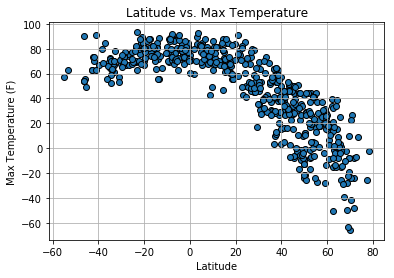

In [27]:
latitude=pd.to_numeric(weather_data.lat)
maxTemp=pd.to_numeric(weather_data.temp)
fahrTemp = (maxTemp * 1.8) + 32
plt.scatter(latitude,fahrTemp,edgecolor='k')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Max Temperature" )
plt.savefig("latVsTempPlot.png")

Observations on Latitude vs. Max Temperature
 1.Equator (0 latitude) is witnessing highest temperatures between 60F - 85F
 2.As we move farther from the equator temperature variance seem to increase
 3.General observation is temperature is colder as we move away from equator
 

#### Latitude vs. Humidity Plot

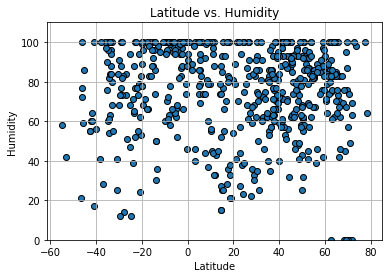

In [34]:
latitude=pd.to_numeric(weather_data.lat)
humidity=pd.to_numeric(weather_data.humidity)
plt.scatter(latitude,humidity,edgecolor='k')
plt.grid()
plt.ylim(0,110)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity" )
plt.savefig("latVsHumidityPlot.png")

Lat Vs Humidity Observations:
There is no direct visible relationship that can be seen between Latitude and Humidity

#### Latitude vs. Cloudiness Plot

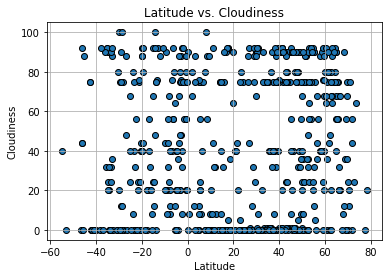

In [35]:
latitude=pd.to_numeric(weather_data.lat)
cloudiness=pd.to_numeric(weather_data.cloudiness)
plt.scatter(latitude,cloudiness,edgecolor='k')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness" )
plt.savefig("latVsCloudinessPlot.png")

In [ ]:
Latitude vs. Cloudiness Plot Observations:
    There is no direct visible relationship that can be seen between Latitude and Cloudiness 

#### Latitude vs. Wind Speed Plot

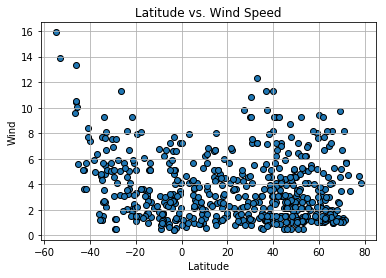

In [36]:
latitude=pd.to_numeric(weather_data.lat)
wind=pd.to_numeric(weather_data.wind)
plt.scatter(latitude,wind,edgecolor='k')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind")
plt.title("Latitude vs. Wind Speed" )
plt.savefig("latVsWindSpeed.png")

Latitude vs. Wind Speed Plot Obervations:
    1. As we move towards the North Pole the wind speed increases 
    2. Wind speed is less near the equator
    3. The farther we go the wind speed seem to increase.
    